<a href="https://colab.research.google.com/github/SrijaniBasu/GenerativeAI_PracticeAssignment/blob/main/Lab_Exercise_1_GAN_on_MNIST_SrijaniBasu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Lab Exercise 1:  Generative Adversarial Networks (GANs) on MNIST**

In [ ]:
pip install torch torchvision torchaudio


   ---------------------------------------- 241.2/241.2 MB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 1.6/1.6 MB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 2.5/2.5 MB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 6.3/6.3 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.9
    Uninstalling sympy-1.9:
      Successfully uninstalled sympy-1.9
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\

## **2. Model Design**

## **1. Introduction**

Generative Adversarial Networks (GANs) are composed of two competing models: a Generator **𝐺** that produces synthetic samples, and a Discriminator **𝐷** that distinguishes real from fake samples. The training process is framed as a minimax game, where
𝐺 tries to fool **𝐷**, and **𝐷** learns to detect fakes.

## **2. Model Design**

**Generator (G):** A multilayer perceptron that maps random noise vectors 𝑧  to 28×28 MNIST-like images.

**Discriminator (D):** A binary classifier that takes 28×28 images and outputs a probability of being real or fake.

# **#Your Tasks 1 here:** Examine the sample code below and answer the following question:

*   (Q1.1) How many network layers are there in the Generator network?

Ans: We can see 4 Linear layers and 4 Activation layers, making a total of 8 layers in the Generator network.

*   (Q1.2) How many network layers are there in the Discriminator network?

Ans: Total layers = 6 (3 Linear + 2 Activations + 1 Sigmoid) in the Discriminator network.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

latent_dim = 100

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256), #Layer1
            nn.ReLU(True), #Layer2
            nn.Linear(256, 512), #Layer3
            nn.ReLU(True), #Layer4
            nn.Linear(512, 1024), #Layer5
            nn.ReLU(True),#Layer6
            nn.Linear(1024, 784), #Layer7
            nn.Tanh()#layer8  # output normalized to [-1,1]
        )
    def forward(self, z):
        return self.model(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512), #Layer1
            nn.LeakyReLU(0.2, inplace=True), #Layer2
            nn.Linear(512, 256), #Layer3
            nn.LeakyReLU(0.2, inplace=True),#Layer4
            nn.Linear(256, 1), #Layer5
            nn.Sigmoid() #Layer6
        )
    def forward(self, x):
        return self.model(x)


# **3. Training Process**

**Step 1:** Train 𝐷 D on both real MNIST digits and generated fake samples.

**Step 2:** Train 𝐺 G to maximize the probability of 𝐷 misclassifying fakes as real.

**Loss Function:** Binary cross-entropy loss was used for both 𝐺 and 𝐷.

**Optimizer:** Adam with learning rate 0.0002.

# **#Your Tasks 2 here:** Examine the sample code below and answer the following question:

*   (Q2.1) What is the batch size used for the training?

Ans: The batch size used for training is 128 ( Line 8 ), meaning that during each iteration the model processes 128 images at once before updating the parameters. This helps balance computational efficiency with stable gradient updates.
*   (Q2.2) What is the loss function used here?

Ans: The loss function applied here is Binary Cross-Entropy Loss (BCELoss) (Line 14 ), which measures the difference between predicted probabilities and the true labels (real = 1, fake = 0). It is well-suited for GANs because the Discriminator outputs probabilities of images being real or fake.

*   (Q2.3) What is the optimizer?

Ans: The optimizer chosen is Adam with a learning rate of 0.0002, applied separately to both Generator ( line 15 ) and Discriminator ( line 16 ) . Adam is preferred because it adapts the learning rate for each parameter, providing faster and more stable convergence compared to vanilla SGD.

*   (Q2.4) How many epochs were setup for the training?

Ans: The training is set up to run for 10 epochs (Line 18 ), which means the entire MNIST dataset is passed through the network ten times. This number gives the model enough iterations to learn meaningful patterns while keeping the training time reasonable.




In [ ]:
#Training Setup
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x.view(-1) - 0.5) / 0.5)  # scale to [-1,1]
])
train_loader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=128, shuffle=True
)

generator = Generator()
discriminator = Discriminator()

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

epochs = 10
for epoch in range(epochs):
    for real_imgs, _ in train_loader:
        batch_size = real_imgs.size(0)

        # Train Discriminator
        real = torch.ones(batch_size, 1)
        fake = torch.zeros(batch_size, 1)

        outputs = discriminator(real_imgs)
        d_loss_real = criterion(outputs, real)

        z = torch.randn(batch_size, latent_dim)
        fake_imgs = generator(z)
        outputs = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(outputs, fake)

        d_loss = d_loss_real + d_loss_fake
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(batch_size, latent_dim)
        fake_imgs = generator(z)
        outputs = discriminator(fake_imgs)
        g_loss = criterion(outputs, real)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch {epoch+1}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")



Epoch 1, D Loss: 0.0095, G Loss: 6.2779
Epoch 2, D Loss: 0.0255, G Loss: 10.1649
Epoch 3, D Loss: 0.1478, G Loss: 3.6611
Epoch 4, D Loss: 0.3507, G Loss: 4.1144
Epoch 5, D Loss: 2.3288, G Loss: 1.2478
Epoch 6, D Loss: 1.0475, G Loss: 2.5840
Epoch 7, D Loss: 1.2491, G Loss: 2.1603
Epoch 8, D Loss: 1.7908, G Loss: 1.1786
Epoch 9, D Loss: 0.9654, G Loss: 1.1566
Epoch 10, D Loss: 0.7953, G Loss: 2.1586


# **# 4. Your Tasks 3 here**: Write Example code to visualize the Generated Digits

After a number of epochs, the generator will begin producing MNIST-style digit-like images. Write or modify the sample code to visualize  the digits generated by the generator at epochs = 10, 20, 30.




Epoch  1, D Loss: 0.7248, G Loss: 2.0204
Epoch  2, D Loss: 1.3098, G Loss: 0.7996
Epoch  3, D Loss: 0.8690, G Loss: 1.8281
Epoch  4, D Loss: 0.9549, G Loss: 1.7191
Epoch  5, D Loss: 0.6035, G Loss: 1.9019
Epoch  6, D Loss: 0.8660, G Loss: 1.2190
Epoch  7, D Loss: 1.0255, G Loss: 1.4622
Epoch  8, D Loss: 0.6213, G Loss: 2.3457
Epoch  9, D Loss: 0.8293, G Loss: 1.8801
Epoch 10, D Loss: 0.9751, G Loss: 1.1395


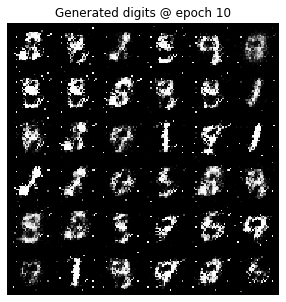

Epoch 11, D Loss: 0.6126, G Loss: 2.2283
Epoch 12, D Loss: 1.1610, G Loss: 1.9490
Epoch 13, D Loss: 1.3662, G Loss: 0.8808
Epoch 14, D Loss: 1.0402, G Loss: 1.4274
Epoch 15, D Loss: 1.0205, G Loss: 1.0184
Epoch 16, D Loss: 0.9824, G Loss: 1.3902
Epoch 17, D Loss: 1.2472, G Loss: 2.1889
Epoch 18, D Loss: 0.9575, G Loss: 1.3580
Epoch 19, D Loss: 1.1105, G Loss: 1.7041
Epoch 20, D Loss: 1.1157, G Loss: 0.9191


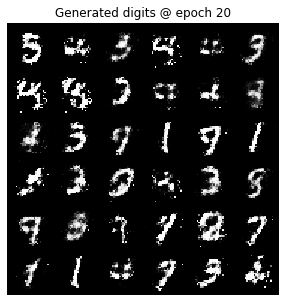

Epoch 21, D Loss: 0.9935, G Loss: 1.1913
Epoch 22, D Loss: 0.8229, G Loss: 1.1469
Epoch 23, D Loss: 1.1587, G Loss: 0.7212
Epoch 24, D Loss: 1.0275, G Loss: 1.6695
Epoch 25, D Loss: 1.2118, G Loss: 1.0035
Epoch 26, D Loss: 1.0592, G Loss: 1.3980
Epoch 27, D Loss: 1.1034, G Loss: 1.0410
Epoch 28, D Loss: 1.0997, G Loss: 0.9927
Epoch 29, D Loss: 1.2119, G Loss: 0.9527
Epoch 30, D Loss: 1.1724, G Loss: 0.6759


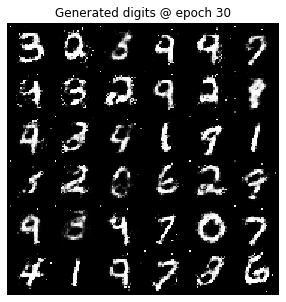

In [ ]:
# Visualize generated digits at epochs 10, 20, and 30
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator.to(device)
discriminator.to(device)

# Use the same noise across epochs so you can compare progress
fixed_z = torch.randn(36, latent_dim, device=device)  # 36 = 6x6 grid

def visualize_and_save(fake_imgs, epoch, nrow=6, fname=None):
    """
        fake_imgs: (N, 784) in [-1, 1]; reshape, unnormalize, plot/save.
    """
    with torch.no_grad():
        imgs = fake_imgs.view(-1, 1, 28, 28)           # (N,1,28,28)
        imgs = (imgs + 1) / 2.0                        # [-1,1] -> [0,1]
        grid = make_grid(imgs, nrow=nrow, padding=2)   # (3,H,W), values in [0,1]

    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.title(f"Generated digits @ epoch {epoch}")
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), interpolation="nearest")
    if fname:
        plt.savefig(fname, bbox_inches="tight", dpi=150)
    plt.show()
    plt.close()

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

epochs = 30
milestones = {10, 20, 30}

for epoch in range(epochs):
    generator.train()
    for real_imgs, _ in train_loader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # --- Train Discriminator ---
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Real
        out_real = discriminator(real_imgs)
        d_loss_real = criterion(out_real, real_labels)

        # Fake
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_imgs = generator(z)
        out_fake = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(out_fake, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # --- Train Generator ---
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_imgs = generator(z)
        out = discriminator(fake_imgs)
        g_loss = criterion(out, real_labels)  # try to fool D

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch {epoch+1:>2}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # --- Visualization at milestones ---
    if (epoch + 1) in milestones:
        generator.eval()
        with torch.no_grad():
            sample = generator(fixed_z)
        visualize_and_save(
            fake_imgs=sample,
            epoch=epoch + 1,
            nrow=6,
            fname=f"samples_epoch_{epoch+1}.png"
        )



# **# 5. Your Tasks 4 here**: Discuss whether the generator successfully learned to create realistic MNIST-like digits,at epochs = 10, 20, 30.

### Epoch 10

At epoch 10, the generated samples are mostly noisy and blurry, with only slight hints of digit-like structures. While a few shapes begin to resemble MNIST digits (like some “1” or “7”-like strokes), the majority of the outputs look like scattered pixels or incomplete blobs. This indicates that the generator has not yet learned enough about the data distribution to create convincing digits.

### Epoch 20

By epoch 20, there is clear improvement compared to epoch 10. The images show more recognizable digit shapes such as “3,” “5,” and “9,” though many are still distorted or fragmented. The generator has started to capture the global structure of digits (straight lines, curves, loops), but the clarity and sharpness are not consistent across all samples. This stage represents the transition where the generator is moving from random noise toward meaningful digit patterns.

### Epoch 30

At epoch 30, the generated digits look much sharper, clearer, and human-recognizable. Most samples strongly resemble real MNIST digits, with distinct forms for digits like “0,” “3,” “4,” and “7.” Although a few images still show imperfections or irregular strokes, the majority are convincingly similar to handwritten digits. This shows that the generator has successfully learned the data distribution and can produce realistic MNIST-style outputs.

Overall Discussion:
The generator progressively improves its ability to produce MNIST-like digits as training advances. At epoch 10 the outputs are mostly noise, at epoch 20 recognizable patterns emerge, and by epoch 30 the digits are largely realistic. This progression demonstrates that the adversarial training worked: the generator learned to fool the discriminator by creating increasingly authentic handwritten digits.
